# RDDs

Trabajando sobre el dataset de los juegos olimpicos

# Creamos un contexo para crear RDDs

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("spark://spark-master:7077")\
        .appName("Transformaciones y Acciones sobre RDDs")\
        .getOrCreate()
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/17 20:17:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
sc=spark.sparkContext

# Cargamos un RDDs

Para la realzación del ejercicio, con ayuda del archivo paises, realizaremos el equivalente de operaciones 'select','count','group by' y 'filter / where'

Cambia el valor de la ruta para que apunte a la ruta donde tienes los datos

In [3]:
data_path = "/home/data/"

In [5]:

equiposOlimpicosRDD = sc.textFile(data_path+"paises.csv").map(lambda line : line.split(","))

In [6]:
equiposOlimpicosRDD.take(10)

[['id', 'equipo', 'sigla'],
 ['1', '30. Februar', 'AUT'],
 ['2', 'A North American Team', 'MEX'],
 ['3', 'Acipactli', 'MEX'],
 ['4', 'Acturus', 'ARG'],
 ['5', 'Afghanistan', 'AFG'],
 ['6', 'Akatonbo', 'IRL'],
 ['7', 'Alain IV', 'SUI'],
 ['8', 'Albania', 'ALB'],
 ['9', 'Alcaid', 'POR']]

### Determinamos la cantidad de siglas para los equipos olímpicos existentes

Con ayuda del método 'take', podrás identificar que en la ultima posisión tenemos las siguas para cada pais/equipo. 

Con esto obtenremos la cantidad precisa de equipos jugadores en los olimpicos

In [24]:
equiposOlimpicosRDD.map(lambda x : (x[2])).distinct().count()

231

### Agrupamos datos para poder determinar cuantos equipos posee un pais

Recuerda que los RDDs poseen una estructura de llave-valor, por lo cual debemos poner primero el valor 'llave'.

Con 'mapValues', al componente 'valor' le indicamos que operación deseamos que se le aplique.

In [25]:
equiposOlimpicosRDD.map(lambda x : (x[2], x[1] )).groupByKey().mapValues(list).take(1)

[('ARG',
  ['Acturus',
   'Antares',
   'Arcturus',
   'Ardilla',
   'Argentina',
   'Argentina-1',
   'Argentina-2',
   'Blue Red',
   'Covunco III',
   'Cupidon III',
   'Djinn',
   'Gullvinge',
   'Matrero II',
   'Mizar',
   'Pampero',
   'Rampage',
   'Tango',
   'Wiking'])]

In [27]:
equiposOlimpicosRDD.map(lambda x :  (x[2], x[1] )).groupByKey().mapValues(len).take(3)


[('ARG', 18), ('AFG', 1), ('IRL', 7)]

Encontrando los 10 paises con la mayor cantidad de equipos

In [37]:
equiposPorPaisRDD=equiposOlimpicosRDD\
                  .map(lambda x :  (x[2], x[1] ))\
                  .groupByKey()\
                  .mapValues(len)\
                  .sortBy(lambda x : x[1],ascending=False)\
                  .take(10)

In [40]:
paises = [dato[0] for dato in equiposPorPaisRDD]
equipos_por_pais = [dato[1] for dato in equiposPorPaisRDD]

Text(0.5, 1.0, 'Los 10 paises con la mayor cantidad de quipos en los juegos Olimpicos')

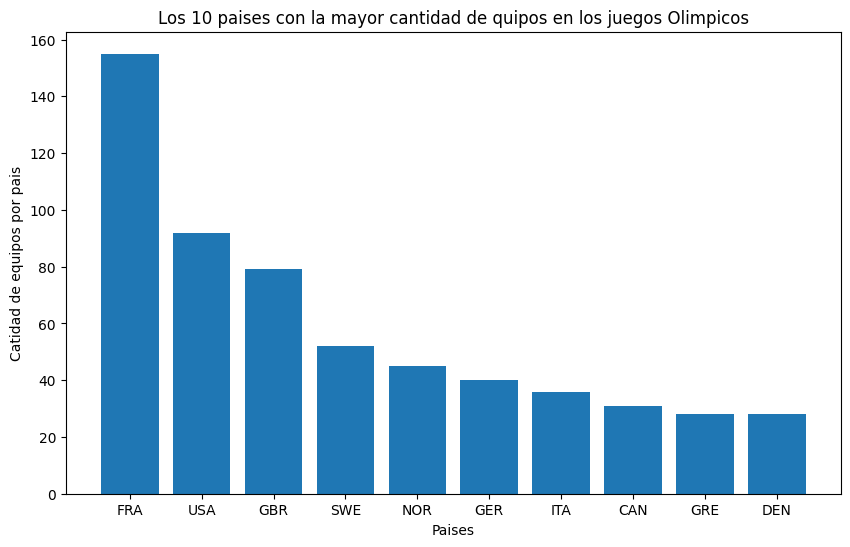

In [48]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.bar(paises,equipos_por_pais)
plt.xlabel("Paises")
plt.ylabel("Catidad de equipos por pais")
plt.title("Los 10 paises con la mayor cantidad de quipos en los juegos Olimpicos")

### Operación filter para obtener un subconjunto

Con el método 'filter', reducimos el conjuntos de equipos.

Nos quedamos con la sigla equivalente de argentina

In [23]:
equiposArgentinos = equiposOlimpicosRDD.filter(lambda l : "FRA" in l)
len(equiposArgentinos.collect())

155

# Accciones sobre RDDs

In [ ]:
deportistaOlimpicoRDD = sc.textFile(path+"deportista.csv").map(lambda line : line.split(","))
deportistaOlimpico2RDD = sc.textFile(path+"deportista2.csv").map(lambda line : line.split(","))

In [ ]:
deportistaOlimpicoRDD = deportistaOlimpicoRDD.union(deportistaOlimpico2RDD)

### Formas de visualizar datos de un RDDs

La operación 'take' nos devuelve 'N' valores que encuentre spark.

La operación 'top', previo ordena respecto al valor llave y nos devuelve 'N' valores.

La operacion 'takeSample', nos devuelve una muestra aleatoria de los valores, Observa que recibe tres parametros

| Orden | Argumento | Descripción | Valor
|-------|--------|-----|--------|
|1|withReplacement|Indica si la muetra podrá traer replicados|Bool|
|2| num| Cantidad de valores a retornar|int|
|3|sed|semilla para el generador aleatorio|int|

Nota: Si encuentras complicado leer el código en los segmentos donde usamos indices en las listas, ejecutalo por partes para que visualizes que componentes seleccionamos 

Nota: Para hacer join con RDDs, debemos tener selecionada la llave al inicio del RDD para poder realizar el cruce.

In [ ]:
deportistaOlimpicoRDD.map(lambda x :[x[-1], x[:-1]]).join(equiposOlimpicosRDD \
                        .map(lambda x : [x[0],x[2]])).take(6)

In [ ]:
deportistaOlimpicoRDD.map(lambda x :[x[-1], x[:-1]]).join(equiposOlimpicosRDD \
                        .map(lambda x : [x[0],x[2]])).top(5)

In [ ]:
deportistaOlimpicoRDD.map(lambda x :[x[-1], x[:-1]]).join(equiposOlimpicosRDD \
                        .map(lambda x : [x[0],x[2]])).takeSample(False,4,10)

## Importancia de countAprox

Debido a la cantidad de datos no siempre es recomendable hacer operaciones tipo count.

Por lo que 'countAprox' es la solución mas viable cuando solo queremos darnos una idea de cuantos datos podemos leer durante un tiempo determinado. Nota: el parametro está en milisegundos

In [ ]:
deportistaOlimpicoRDD.map(lambda x :[x[-1], x[:-1]]).join(equiposOlimpicosRDD \
                            .map(lambda x : [x[0],x[2]])).count()

In [ ]:
deportistaOlimpicoRDD.map(lambda x :[x[-1], x[:-1]]).join(equiposOlimpicosRDD \
                        .map(lambda x : [x[0],x[2]])).countApprox(20)

# Acciones de modificacion

### Obtenemos el equipo y el deportista

Guardamos el RDD resultante en equipoDeportista

In [ ]:
equipoDeportista = deportistaOlimpicoRDD.map(lambda x :[x[-1], x[:-1]]).join(equiposOlimpicosRDD \
                                            .map(lambda x : [x[0],x[2]]))

In [ ]:
equipoDeportista.take(1)


In [ ]:
equipoDeportista.map(lambda x : (x[1][0][0],x[1][0][1:],x[1][1]) )

### Carga de resultados

Esta tabla posee las medallas que los jugadores han ganado

In [ ]:
resultado = sc.textFile(path+"resultados.csv").map(lambda line : line.split(","))

Eliminamos todas las medallas no ganadoras y nos quedamos con el valor de la medalla y  del deportista_id

In [ ]:
resultadoGanador = resultado.filter(lambda l : 'NA' not in l[1])
resultadoGanador = resultadoGanador.map(lambda l : [l[2],l[1]])

In [ ]:
resultadoGanador.take(15)

### Obtenemos la relación buscada: deportista,pais y medalla.

In [ ]:
jugadoresMedalla =  equipoDeportista.join(resultadoGanador)
jugadoresMedalla.take(1)

### Agrupamos las medallas respecto a la sigla del pais jugador

In [ ]:
d = {'Gold':7, 'Silver':5, 'Bronze':4}
paisesMedallas = jugadoresMedalla.map(lambda x : (x[1][0][-1],d[x[1][1]]) )
paisesMedallas.takeSample(False,10)

### Obtenemos los valores de los puntuajes históricos de los paises jugadores

In [ ]:
from operator import add
conclusion = paisesMedallas.reduceByKey((add)).sortBy(lambda x : x[1],ascending=False)
conclusion.take(10)

# Estadística básica sobre los RDDs

Spark posee una suite integrada de forma natural para poder obtener estadísticas básicas.

In [ ]:
conclusion.map(lambda l : l[1]).stats()

In [ ]:
conclusion.map(lambda l : l [1]).mean()

In [ ]:
conclusion.map(lambda l : l [1]).sum()

In [ ]:
conclusion.map(lambda l : l [1]).histogram(10)

In [49]:
spark.stop()